In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import pickle

### Retrieve csv and concatenate them

In [2]:
top50_españa = pd.read_csv("../Project3/top50españa.csv")
rock = pd.read_csv("../Project3/rock.csv")

In [3]:
spotify = pd.concat([top50_españa, rock])

In [4]:
spotify.head()

,Unnamed: 0,name,album,artist,uri,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Still Rapping,Avida Dollars,C. Tangana,spotify:track:5wNCqj7omYnDl7gE4BzSNS,2018-04-20,89899,46,0.729,0.46700,0.628,0.000000,0.0998,-6.281,0.2410,149.965,4
1,1,Baile de la Lluvia,Avida Dollars,C. Tangana,spotify:track:1gV7dIp1UP99KQr33r8hXg,2018-04-20,194183,47,0.788,0.03460,0.711,0.000000,0.3430,-4.833,0.0499,140.001,4
2,2,Cuando Me Miras,Avida Dollars,C. Tangana,spotify:track:5THnzdXOBNjVD4fipR3EAu,2018-04-20,143127,55,0.824,0.41100,0.570,0.000060,0.1540,-6.768,0.0700,120.029,4
3,3,Na de Na,Avida Dollars,C. Tangana,spotify:track:0VSLBskAbpojh44ycMckgv,2018-04-20,140660,43,0.666,0.00965,0.751,0.000065,0.5400,-4.496,0.0957,138.040,4
4,4,Huele a Nuevo - feat. Sticky M.A.,Avida Dollars,C. Tangana,spotify:track:0O0ZCpralGox0wfbZrP8iJ,2018-04-20,134147,42,0.735,0.05760,0.772,0.000000,0.1140,-4.537,0.0996,158.043,4


In [5]:
spotify.drop(['Unnamed: 0'], axis=1, inplace= True)

In [6]:
spotify.drop_duplicates()

,name,album,artist,uri,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Still Rapping,Avida Dollars,C. Tangana,spotify:track:5wNCqj7omYnDl7gE4BzSNS,2018-04-20,89899,46,0.729,0.46700,0.628,0.000000,0.0998,-6.281,0.2410,149.965,4
1,Baile de la Lluvia,Avida Dollars,C. Tangana,spotify:track:1gV7dIp1UP99KQr33r8hXg,2018-04-20,194183,47,0.788,0.03460,0.711,0.000000,0.3430,-4.833,0.0499,140.001,4
2,Cuando Me Miras,Avida Dollars,C. Tangana,spotify:track:5THnzdXOBNjVD4fipR3EAu,2018-04-20,143127,55,0.824,0.41100,0.570,0.000060,0.1540,-6.768,0.0700,120.029,4
3,Na de Na,Avida Dollars,C. Tangana,spotify:track:0VSLBskAbpojh44ycMckgv,2018-04-20,140660,43,0.666,0.00965,0.751,0.000065,0.5400,-4.496,0.0957,138.040,4
4,Huele a Nuevo - feat. Sticky M.A.,Avida Dollars,C. Tangana,spotify:track:0O0ZCpralGox0wfbZrP8iJ,2018-04-20,134147,42,0.735,0.05760,0.772,0.000000,0.1140,-4.537,0.0996,158.043,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,You Like Me Too Much - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:0y1LLH0NiwOD5tM3aNMXTr,1965-08-06,156866,48,0.555,0.41500,0.570,0.000000,0.1910,-7.869,0.0302,88.316,4
6667,Tell Me What You See - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:2jnr9KaaMAmvk0zMcM9UzV,1965-08-06,157986,47,0.592,0.06100,0.796,0.000000,0.1310,-8.125,0.0429,136.675,4
6668,I've Just Seen A Face - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:788U1Sqej9M6c4iikuDGxO,1965-08-06,125040,62,0.647,0.72300,0.560,0.000000,0.1180,-8.809,0.0387,120.418,3
6669,Yesterday - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,76,0.332,0.87900,0.179,0.000000,0.0886,-11.830,0.0326,96.529,4


### Create a new df for the features we want to use

In [7]:

spotify_features = spotify[['danceability', 'acousticness',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo']]

### Clustering

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
spotify_features_scaled = scaler.fit_transform(spotify_features)

In [11]:
pd.DataFrame(spotify_features_scaled)

,0,1,2,3,4,5,6,7
0,0.748376,1.094302,-0.604907,-0.337122,-0.671982,0.004197,1.285836,0.786575
1,1.050968,-0.708392,-0.153986,-0.337122,0.267245,0.492482,-0.540454,0.477612
2,1.235600,0.860836,-0.920009,-0.336790,-0.462664,-0.160026,-0.348364,-0.141680
3,0.425270,-0.812410,0.063326,-0.336764,1.028051,0.606123,-0.102756,0.416805
4,0.779148,-0.612504,0.177414,-0.337122,-0.617143,0.592298,-0.065485,1.037058
...,...,...,...,...,...,...,...,...
15536,-0.144012,0.877512,-0.920009,-0.337122,-0.319772,-0.531298,-0.728721,-1.125037
15537,0.045749,-0.598329,0.307801,-0.337122,-0.551489,-0.617624,-0.607351,0.374479
15538,0.327825,2.161578,-0.974337,-0.337122,-0.601695,-0.848278,-0.647489,-0.129618
15539,-1.287706,2.811948,-3.044229,-0.337122,-0.715236,-1.867000,-0.705785,-0.870368


### Look for the optimal number of clusters

In [14]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [15]:
#Find the silhouette score for the optimal number of clusters

K = range(2, 20)
silhouette = []
          
for n_clusters in K:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(spotify_features_scaled)
    centers = clusterer.cluster_centers_

    
    score = silhouette_score(spotify_features_scaled, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = range(2, 20), silhouette score is 0.20044422535080597)
For n_clusters = range(2, 20), silhouette score is 0.23330651280118384)
For n_clusters = range(2, 20), silhouette score is 0.22643997824963663)
For n_clusters = range(2, 20), silhouette score is 0.21076260897579868)
For n_clusters = range(2, 20), silhouette score is 0.22266265794922663)
For n_clusters = range(2, 20), silhouette score is 0.21950510612757942)
For n_clusters = range(2, 20), silhouette score is 0.21069754454215606)
For n_clusters = range(2, 20), silhouette score is 0.20977183911745176)
For n_clusters = range(2, 20), silhouette score is 0.20748394965152314)
For n_clusters = range(2, 20), silhouette score is 0.20547982529941694)
For n_clusters = range(2, 20), silhouette score is 0.1964486400797659)
For n_clusters = range(2, 20), silhouette score is 0.19241250458393216)
For n_clusters = range(2, 20), silhouette score is 0.1786675666337187)
For n_clusters = range(2, 20), silhouette score is 0.1836779717495

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

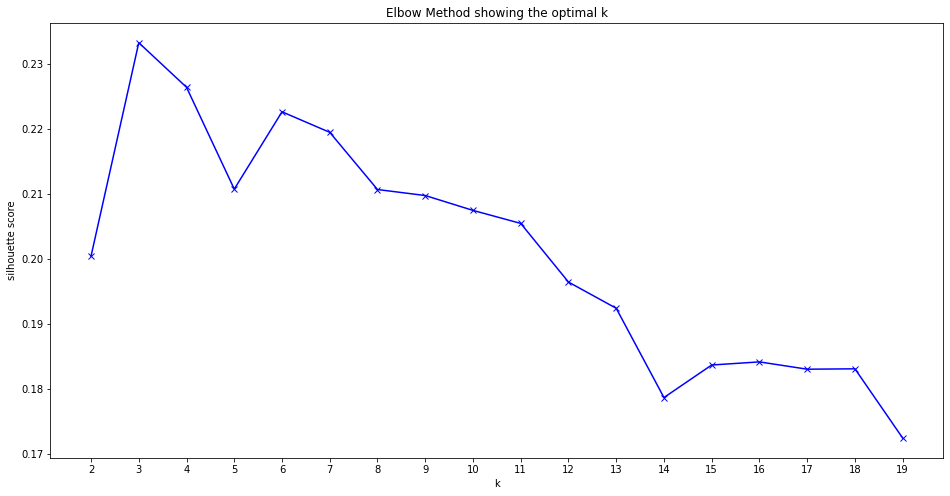

In [16]:
# plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Since 3 clusters is a low number to classify the different kind of songs, I'll go for 6 to have a better representation for each style

In [17]:
kmeans = KMeans(n_clusters=6, random_state=1234)

In [18]:
kmeans.fit(spotify_features_scaled)

KMeans(n_clusters=6, random_state=1234)

In [19]:
clusters = kmeans.predict(spotify_features_scaled)

In [20]:
clusters

array([2, 1, 1, ..., 0, 0, 2], dtype=int32)

In [21]:
pd.Series(clusters).value_counts()

1    6457
2    3638
3    2368
0    1882
4     968
5     228
dtype: int64

In [22]:
spotify["cluster"] = clusters

In [24]:
spotify

,name,album,artist,uri,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Still Rapping,Avida Dollars,C. Tangana,spotify:track:5wNCqj7omYnDl7gE4BzSNS,2018-04-20,89899,46,0.729,0.46700,0.628,0.000000,0.0998,-6.281,0.2410,149.965,4,2
1,Baile de la Lluvia,Avida Dollars,C. Tangana,spotify:track:1gV7dIp1UP99KQr33r8hXg,2018-04-20,194183,47,0.788,0.03460,0.711,0.000000,0.3430,-4.833,0.0499,140.001,4,1
2,Cuando Me Miras,Avida Dollars,C. Tangana,spotify:track:5THnzdXOBNjVD4fipR3EAu,2018-04-20,143127,55,0.824,0.41100,0.570,0.000060,0.1540,-6.768,0.0700,120.029,4,1
3,Na de Na,Avida Dollars,C. Tangana,spotify:track:0VSLBskAbpojh44ycMckgv,2018-04-20,140660,43,0.666,0.00965,0.751,0.000065,0.5400,-4.496,0.0957,138.040,4,2
4,Huele a Nuevo - feat. Sticky M.A.,Avida Dollars,C. Tangana,spotify:track:0O0ZCpralGox0wfbZrP8iJ,2018-04-20,134147,42,0.735,0.05760,0.772,0.000000,0.1140,-4.537,0.0996,158.043,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,You Like Me Too Much - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:0y1LLH0NiwOD5tM3aNMXTr,1965-08-06,156866,48,0.555,0.41500,0.570,0.000000,0.1910,-7.869,0.0302,88.316,4,0
6667,Tell Me What You See - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:2jnr9KaaMAmvk0zMcM9UzV,1965-08-06,157986,47,0.592,0.06100,0.796,0.000000,0.1310,-8.125,0.0429,136.675,4,2
6668,I've Just Seen A Face - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:788U1Sqej9M6c4iikuDGxO,1965-08-06,125040,62,0.647,0.72300,0.560,0.000000,0.1180,-8.809,0.0387,120.418,3,0
6669,Yesterday - Remastered 2009,Help! (Remastered),The Beatles,spotify:track:3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,76,0.332,0.87900,0.179,0.000000,0.0886,-11.830,0.0326,96.529,4,0


In [25]:
pickle.dump(kmeans, open("kmeans", "wb"))
pickle.dump(scaler, open("scaler", "wb"))

In [27]:
spotify.to_csv("../Project3/spotify_clustering.csv")